### Initial Attempt in Implementing Adaline
- Personally implemented this code using the high-level/formal details provided by the book


### Steps in Training Perceptron

1. Initialize the weights and bias to 0 or small random numbers
2. For each training example, $x^{(i)}$
   
   a. Compute the output value, $y^{(i)}$

   - $z = Xw^T + b$
   - $\sigma(z) = \sum_{i}(w_j x_j^{(i)} + b)$ otherwise

   b. Loss Function Definition
   - $L(\text{w},b) = \frac{1}{n} \sum_{i=1}^{n}(y^{(i)} - \sigma(z^{(i)}))^2$

   c. Update the weights and bias unit

   - $w_j := w_j - \eta \frac{\partial L}{\partial w_j}$

   - $b := b - \eta \frac{\partial L} {\partial b}$ 
  
   - Where:
   - $\frac{\partial L}{\partial w_j} = - \frac{2}{n} \sum_{i=1} (y^{(i)} - \sigma(z^{(i)}))x_{j}^{(i)}$ 
   - $\frac{\partial L}{\partial w_j} = - \frac{2}{n} \sum_{i=1} (y^{(i)} - \sigma(z^{(i)}))$ 

   - $w_j := w_j + \eta (\frac{2}{n} \sum_{i=1} (y^{(i)} - \sigma(z^{(i)}))x_{j}^{(i)})$
   - $b_j := b_j + \eta (\frac{2}{n} \sum_{i=1} (y - \sigma(z)))$ 

   **Note:**
   - $x^{(150)}$ means the $150^{\text{th}}$ sample row-wise
   - $x_j$ means the $j^{\text{th}}$ column of $x$



In [75]:
import numpy as np


class AdalineClassifier:

    def __init__(self, n_iter=100, lr=0.01, thresh=0.5):
        self.n_iter = n_iter
        self.lr = lr
        self.thresh = 0.5
        np.random.seed(69)

    def grad_w(self, X, y, y_pred):
        m = X.shape[0]
        err = y - y_pred                            # m x 1 vector
        grad = (2 * self.lr / m ) * ( err.T @ X )   # (1 x m) * (m x n) => 1 x n
        return grad
    
    def update_weights(self, X, y, y_pred):
        self.weights = self.weights + self.grad_w(X, y, y_pred)

    def grad_b(self, y, y_pred):
        grad = self.lr * 2 * (y - y_pred) / y.shape[0]
        return grad

    def update_bias(self, y, y_pred):
        self.bias = self.bias + self.grad_b(y, y_pred)

    def mean_squared_error(self, y, y_pred):
        m = y.shape[0]
        err = y - y_pred
        return (err.T @ err) / m 
    
    def unit_step(self, X):
        return np.where(X - self.thresh >= 0, 1, 0)

    def net_input(self, X):
        return (self.weights @ X.T + self.bias).reshape(-1)
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return self.unit_step(self.net_input(X))

    def fit(self, X, y):
        self.num_feats = X.shape[1]
        self.weights = np.random.rand(1, self.num_feats)
        self.bias = np.random.rand(1)[0]
        self.loss_history = []

        for curr_iter in range(1, self.n_iter + 1):

            y_pred = self.net_input(X)
            y_pred = self.activation(y_pred)
            err_rate = self.mean_squared_error(y, y_pred)

            print(f'[{curr_iter}/{self.n_iter}] Prediction Error (MSE) = {err_rate}')
            self.loss_history.append(err_rate)

            self.update_weights(X, y, y_pred)
            self.update_bias(y, y_pred)


[1/30000] Prediction Error (MSE) = 41.44387225357213
[2/30000] Prediction Error (MSE) = 40.439177950350626
[3/30000] Prediction Error (MSE) = 39.45899717997505
[4/30000] Prediction Error (MSE) = 38.50273174919519
[5/30000] Prediction Error (MSE) = 37.56979806228722
[6/30000] Prediction Error (MSE) = 36.65962676483448
[7/30000] Prediction Error (MSE) = 35.77166239620128
[8/30000] Prediction Error (MSE) = 34.9053630504872
[9/30000] Prediction Error (MSE) = 34.06020004575491
[10/30000] Prediction Error (MSE) = 33.23565760132981
[11/30000] Prediction Error (MSE) = 32.43123252297452
[12/30000] Prediction Error (MSE) = 31.64643389574569
[13/30000] Prediction Error (MSE) = 30.88078278434631
[14/30000] Prediction Error (MSE) = 30.13381194078986
[15/30000] Prediction Error (MSE) = 29.405065519198505
[16/30000] Prediction Error (MSE) = 28.69409879756083
[17/30000] Prediction Error (MSE) = 28.000477906279574
[18/30000] Prediction Error (MSE) = 27.323779563343354
[19/30000] Prediction Error (MSE) 

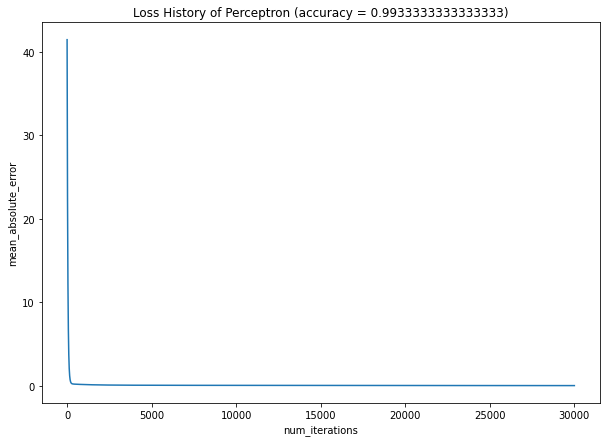

In [76]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None, encoding='utf-8')


y = np.where(df[4].to_numpy() == 'Iris-setosa', 0, 1)
X = df[[0,1,2,3]].to_numpy()

n_iter = 30000
lr = 0.0001
perceptron_iris = AdalineClassifier(n_iter=n_iter, lr=lr)

perceptron_iris.fit(X,y)


y_pred = perceptron_iris.predict(X)
acc_score = accuracy_score(y, y_pred)

print('Accuracy Score = ', accuracy_score(y, y_pred))

total_iterations = perceptron_iris.n_iter


plt.figure(figsize=(10,7))
plt.plot(np.arange(1, total_iterations + 1), perceptron_iris.loss_history)

plt.xlabel('num_iterations')
plt.ylabel('mean_absolute_error')
plt.title(f'Loss History of Perceptron (accuracy = {acc_score})')
plt.show()


### Implementation Error: 
I've set the original weight update equation with the following

$w_j := w_j - \eta (\frac{2}{n} \sum_{i=1} (y^{(i)} - \sigma(z^{(i)}))x_{j}^{(i)})$

$b_j := b_j - \eta (\frac{2}{n} \sum_{i=1} (y - \sigma(z)))$ 

Where it should be:


$w_j := w_j + \eta (\frac{2}{n} \sum_{i=1} (y^{(i)} - \sigma(z^{(i)}))x_{j}^{(i)})$

$b_j := b_j + \eta (\frac{2}{n} \sum_{i=1} (y - \sigma(z)))$ 